Here is the formatted content for your Jupyter Notebook. You can copy and paste this directly into your notebook:



# pre-class workbook
cs114. lesson 2. statistics.

time guide: you should allocate approximately 2½ hours to preparing for class, including reading the study guide and doing the pre-class exercises.

## session video

here is the link for today's summary video. if you have any questions, make sure to ask them below.

## introduction to statistics

from wasserman, l. (2004). all of statistics.

> “the basic problem that we study in probability is: given a data generating process, what are the properties of the outcomes?”
> “the basic problem of statistical inference is the inverse of probability: given the outcomes, what can we say about the process that generated the data?”

in lesson 1, we looked at probability theory as the framework behind data generating processes (also called models or simulations). in this lesson, we look at statistics as the framework behind the inverse process. you will also see examples where we combine probability and statistics – where we identify a plausible model using some observed data, and then make predictions using the plausible model.

when applying statistical methods, we generally try to answer one of four types of questions:

- hypothesis testing / model comparison: which one of two (or more) simulations generated the observed data? or, given the data, which simulation is the right one?
- parameter estimation: what were the inputs to a known simulation that produced the observed data? or, given the data, which input variables were used in the simulation?
- prediction: what will future data from the same simulation and with the same input variables look like?
- causation: what will happen if we intervene in the simulation and change something about how it works.

in this lesson, we focus on the first three questions. the final question (causation) is important and different enough that we devote the next lesson (lesson 3) to it.

## sidebar: why do people hate statistics?

from james b. ramsey, j.b. (1999). why do students find statistics so difficult? (this short article (4 pages) is recommended reading for everyone but the most important part is below.)

> it is a common experience for statisticians when introducing themselves to a non-statistician at a reception to be greeted with the observation; “i took statistics once and hated it; all those formulae to memorise.” the questions are why we get this reaction and what we can do about it. in my answer below i am presuming it is useful for society at large, much less the profession itself, that non-statisticians should have a reasonably sophisticated understanding of statistics and probability. further, it is a depressing fact that corporations, government agencies, and other organisations are staffed with individuals, even those holding ma degrees, who do not understand what it is that they are doing and why. again we should query why the state described is universally true.
> [...]
> because the student finds the typical exposition so baffling, the student's defence is to rely solely on the memorisation of formulae. the memorised formulae are then inserted into “problems” for which rules of thumb have been developed, often aided by the instructor, to know which formula is to be plugged into which problem. this is not a bad strategy for getting a good grade in the course. however, once the memorisation strategy has been espoused, learning by the student is now entirely lost.

statistics is a very opaque field to outsiders (non-statisticians). there are some necessary reasons for this – it requires math which not everyone is comfortable with and it takes time to build good intuition for how probability and statistics work. but, there are some very unnecessary reasons too.

- using hard-to-remember technical names makes it difficult to read, never mind understand, statistical texts. for example, calling something bessel’s correction rather than a population vs sample correction for computing standard deviation, or calling something the bonferroni correction rather than a multiple-comparison correction when doing many hypothesis tests, doesn't aid understanding.
- memorizing formulas rather than understanding the underlying data generating process makes it difficult to generalize or transfer your knowledge. memorization also gives a false sense of confidence since we might apply a formula and get a good-looking answer without carefully checking whether or not the formula is applicable in the given context.
- it seems that there are lots of different ways to do the same thing in statistics – should you use the f-test, t-test, chi-squared test, a particular correction factor, anova, etc.? but, in fact, there are very few types of processes in statistics.

we either run a model/simulation forward (probability) or we try to figure out which model/simulation explains our data (statistics). everything else follows from those principles. every statistical test is, at its core, the same thing. it compares two (or more) models/simulations to decide which ones offer a plausible explanation of the data. you will see many examples of this process in the pre-class work.

every statistical test is derived in this way (so are p-values) and we get a whole zoo of different tests because there are different types of random variables and different distributions over random variables and because we have to make approximations when the math is too complicated. these different variables or approximations are given names but learning the names directly is almost useless in the long run.

okay, enough ranting. how do we do statistics?

## question 1 of 10
any questions?

are there any questions you would like us to discuss during the class? as you go through the readings and exercises in this workbook, return to this point and make a list of questions you would like us to clear up in class.

## model comparison

- make sure you understand how the model/simulation generates outputs.
- look at the data you were given.
- which model is more likely to have generated the observed data?

this is the essence of model comparison, also known as hypothesis testing. you can compare more than two models this way but, we'll stick to two for today to keep things simple.

## required exercise: model comparison #1

below are two simulations, called model1 and model2. you can run them as many times as you want or change the number of samples to experiment with the histograms of outputs.

run the code cell below.

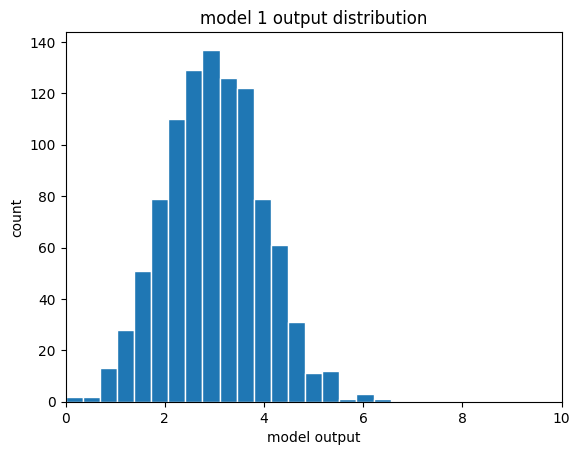

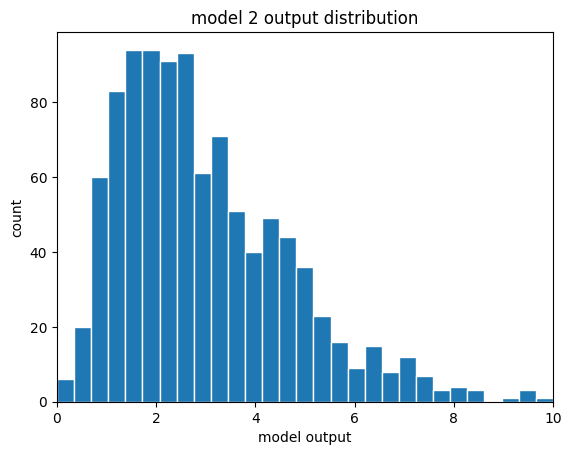

In [1]:
import scipy.stats as sts


def model1(samples=1000):
    return sts.norm(3, 1).rvs(size=samples)


def model2(samples=1000):
    return sts.gamma(3, scale=1).rvs(size=samples)


import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.title("model 1 output distribution")
plt.xlabel("model output")
plt.ylabel("count")
plt.hist(model1(), bins=np.linspace(0, 10, 30), edgecolor="white")
plt.xlim(0, 10)

plt.figure()
plt.title("model 2 output distribution")
plt.xlabel("model output")
plt.ylabel("count")
plt.hist(model2(), bins=np.linspace(0, 10, 30), edgecolor="white")
plt.xlim(0, 10)

plt.show()

In [ ]:
run code
out [3]

here's a data set. run the code cell below.

In [1]:
data = [3.1656, 3.184, 2.964, 2.741, 1.010, 3.939, 1.794, 2.725, 1.483, 3.484]

plt.figure()
plt.title(f"data histogram ({len(data)}) values")
plt.xlabel("data")
plt.ylabel("count")
plt.hist(data, edgecolor="white")
plt.xlim(0, 10)
plt.yticks([0, 1, 2])
plt.show()

NameError: name 'plt' is not defined

In [ ]:
run code
out [4]

## question 2 of 10
which of the two models above do you think generated the data set? how certain are you? express your answer as a percentage and explain your reasoning. for example, "i’m 80% certain model a generated the data because ..." or "i can’t choose – i’m 50% certain it’s model a and 50% certain it’s model b – because ..." refer to relevant features of the distribution to explain your conclusion.

you're not expected to do any math here. use the shapes of the distributions to support your argument.

i am 65% certain that model 1 generated the data. the main reason for this is the shape of the distribution of the data.

the data appears to center around the value 3 on the x-axis, which aligns closely with model 1’s output. although the sample size is small (10 values), the distribution remains relatively consistent and clustered around the central value, suggesting that the underlying model is designed to produce results near 3.

i chose 65% certainty because, with more iterations, i would expect this distribution to more clearly represent the law of large numbers, where more data points would reinforce the central tendency at 3.

on the other hand, model 2’s output seems to center more around the value 2 on the x-axis, which doesn’t match the data as well. while some larger values in the data lean towards model 2, this pattern is less consistent, with only a few values deviating in that direction. if model 2 were the true generator, i would expect the majority of data points to cluster around 2, which is not the case here.

## required exercise: model comparison #2: hidden model

below are two more models. this time the code cell is hidden but you can still run it as many times as you want to see samples from the two models.

run the hidden code cell below.

In [ ]:
run code
out [7]

the data set. run the code cell below.

In [ ]:
data = [
    4.859,
    5.092,
    5.266,
    5.372,
    7.200,
    5.566,
    4.982,
    3.650,
    2.659,
    4.515,
    4.705,
    4.885,
    3.777,
    6.074,
    7.704,
    5.790,
    5.629,
    4.381,
    4.346,
    4.458,
]

plt.figure()
plt.title(f"data histogram ({len(data)}) values")
plt.xlabel("data")
plt.ylabel("count")
plt.hist(data, edgecolor="white")
plt.xlim(0, 10)
plt.show()

In [ ]:
run code
out [8]

## question 3 of 10
which model generated the data set? how certain are you? express your answer as a percentage and explain your reasoning. refer to relevant features of the distribution to explain your conclusion.

i’m 80% certain that neither of the above models created this histogram. my confidence increased because we are working with 20 values, and many of these values cluster around the x-axis value 5. based on this observation, neither model 1 nor model 2 matches the data distribution well.

from my visual inspection, model 1 tends to center around output 4, while model 2 appears to center around output 6 on the x-axis. however, in the histogram, most values are grouped around 5, which doesn’t align with either model’s expected output. unless there were extreme deviations in the data, which don’t seem evident here, it’s unlikely that either model produced these results.

again, i could be wrong because these might be early stages, where the law of large numbers hasn't applied yet.

## required exercise: model comparison #3

run the hidden code cell below.

In [ ]:
run code
out [10]

the data set. run the code cell below.

In [ ]:
data = [
    4.526,
    5.957,
    5.124,
    7.232,
    4.994,
    5.047,
    2.400,
    4.908,
    6.093,
    5.038,
    4.944,
    7.046,
    4.412,
    5.315,
    3.131,
    5.719,
    5.133,
    2.756,
    4.942,
    3.128,
]

plt.figure()
plt.title(f"data histogram ({len(data)}) values")
plt.xlabel("data")
plt.ylabel("count")
plt.hist(data, edgecolor="white")
plt.xlim(0, 10)
plt.show()

In [ ]:
run code
out [11]

## question 4 of 10
which model generated the data set? how certain are you? express your answer as a percentage and explain your reasoning. refer to relevant features of the distribution to explain your conclusion.

this one is tricky, but i believe that model 2 generated this histogram. although much of the data sharply clusters around the value 5, which could suggest model 1, there are key details that make me lean toward model 2. model 1 is limited to a narrower range of x-axis values, primarily between 3 and 7, while model 2 covers the entire range from 0 to 10. this wider range better aligns with the spread of data in the histogram.

however, i do have some reservations. model 2 seems to distribute the data more evenly between 4 and 5, while model 1 shows a sharper concentration of values around 5. despite this, the broader variety of data points, including values closer to 2, makes me favor model 2.

given this balance of factors, i remain uncertain and would say i’m 50% confident that model 2 generated the data.

## optional exercise: model comparison #4: stock price models

two people want to make money on the stock market. each person thinks they can make money because they have a clever way of predicting stock prices by building a stock price model.

their amazing stock price models are given below, along with real stock data (in black on the plot). you can run the cell multiple times to generate more simulated stock prices. you can also change the number_of_samples variable to generate more stock graphs on the same plots.

run the code cell below.

In [ ]:
def model1():
    import numpy as np
    import scipy.stats as sts

    alpha = 6.263e-4
    beta = 1.999e-2
    start_price = 524.59
    n = 250
    prices = [start_price]
    while len(prices) < n:
        prices.append(prices[-1] * np.exp(sts.norm.rvs(loc=alpha, scale=beta)))
    return prices


def model2():
    import numpy as np
    import scipy.stats as sts

    alpha = 5.331e-4
    beta = 1.993e-2
    gamma = 5.013e-5
    start_price = 524.59
    n = 250
    prices = [start_price]
    vel = alpha
    while len(prices) < n + 1:
        prices.append(
            prices[-1] * np.exp(vel) * np.exp(sts.norm.rvs(loc=0, scale=beta))
        )
        vel = vel * 0.8 + alpha * 0.2 + sts.norm.rvs(loc=0, scale=gamma)
    return prices[1:]


data = [
    524.59,
    540.73,
    522.86,
    520.8,
    500.49,
    508.89,
    510.4,
    499.1,
    494.25,
    507.79,
    500.86,
    497.98,
    501.77,
    586.34,
    579.84,
    565.17,
    556.78,
    561.93,
    523.28,
    538.6,
    532.39,
    539.04,
    548.16,
    539.45,
    552.16,
    550.79,
    547.92,
    559.07,
    563.59,
    557.59,
    556.52,
    557.28,
    551.34,
    548.22,
    540.22,
    533.78,
    546.15,
    553.41,
    546.7,
    538.85,
    550.64,
    547.82,
    520.7,
    511.29,
    516.39,
    493.33,
    506.44,
    504.54,
    523.06,
    518.02,
    520.25,
    524.03,
    524.44,
    504.79,
    512.18,
    523.11,
    535.09,
    520.81,
    502.86,
    508.05,
    513.95,
    513.39,
    521.66,
    539.42,
    540.67,
    544.53,
    546.99,
    554.58,
    555.31,
    552.78,
    553.73,
    540.02,
    549.22,
    546.54,
    554.44,
    549.57,
    508.9,
    508.78,
    505.55,
    510.3,
    505.55,
    506.52,
    509,
    513.47,
    509.11,
    503.18,
    496.08,
    499.55,
    503.84,
    486.69,
    495.08,
    484.98,
    486.66,
    493.37,
    488.94,
    486.28,
    487.7,
    501.67,
    497.89,
    502.9,
    501.34,
    502.36,
    503.86,
    502.81,
    499.08,
    499.24,
    489.43,
    494.74,
    494.66,
    492.39,
    485.81,
    487.27,
    488.77,
    499.89,
    491.9,
    492.41,
    498.34,
    500.77,
    497,
    508.82,
    512.74,
    518.06,
    527.07,
    533.03,
    533.5,
    528.21,
    533.54,
    533.98,
    541.64,
    535.96,
    530.76,
    535.98,
    537.31,
    540.68,
    547.95,
    542.95,
    530.31,
    532.28,
    531.05,
    513.63,
    511.77,
    515.41,
    516.49,
    518.91,
    519.3,
    514.25,
    517.57,
    515.15,
    510.82,
    517.35,
    524.89,
    520.55,
    519.97,
    515.84,
    512.4,
    510.72,
    515.92,
    517.92,
    518.91,
    521.87,
    543.71,
    546.88,
    553.33,
    553.41,
    547.58,
    550.12,
    558.92,
    566.18,
    569.19,
    582.07,
    588.55,
    590.53,
    606.71,
    606.05,
    597.54,
    598.72,
    589.29,
    577.76,
    582.87,
    586.5,
    589.35,
    575.43,
    573.14,
    590.65,
    593.26,
    592.39,
    592.64,
    583.85,
    599.06,
    610.34,
    613.15,
    603.35,
    634.81,
    639.1,
    631.85,
    632.66,
    627.04,
    624.94,
    629.76,
    633.8,
    628.29,
    637.97,
    639,
    625.14,
    653.16,
    664.78,
    671.66,
    668.52,
    662.92,
    674.05,
    690.31,
    681.17,
    677.72,
    688.29,
    668.4,
    645.72,
    651.45,
    655.99,
    646.91,
    657.58,
    682.61,
    679.33,
    687.4,
    691.69,
    682.02,
    678.8,
    659.2,
    654.06,
    658.29,
    665.64,
    663.84,
    641.9,
    617.77,
    616.47,
    602.13,
    612.69,
    625.58,
    628.08,
    611,
    611.66,
    604.56,
    597.99,
    605.04,
    591.06,
    586.73,
    593.74,
    604.92,
    614.24,
    614.09,
    613.12,
]

number_of_samples = 100

plt.figure(figsize=(8, 6))
plt.title(f"Model 1 simulated stock price ({number_of_samples} samples)")
plt.xlabel("day")
plt.ylabel("price ($)")
for _ in range(number_of_samples):
    plt.plot(model1(), alpha=0.5)
plt.plot(data, "k", label="real data")
plt.legend()

plt.figure(figsize=(8, 6))
plt.title(f"Model 2 simulated stock price ({number_of_samples} samples)")
plt.xlabel("day")
plt.ylabel("price ($)")
for _ in range(number_of_samples):
    plt.plot(model2(), alpha=0.5)
plt.plot(data, "k", label="real data")
plt.legend()

plt.show()

In [ ]:
question 5 of 10
which model generates data that looks most like the real data? how certain are you? express your answer as a percentage and explain your reasoning. refer to relevant features of the distribution to explain your conclusion.

i am 75% certain that model 2 is better for predicting stock prices. when working with smaller sample sizes, i noticed fewer discrepancies between the simulated lines and the real data. however, as i increased the sample size to hundreds, model 1 showed more significant outliers, and in simulations with 20 samples, the lines from model 1 intersected the real data more frequently. over the long run, this led to a greater variance. in contrast, model 2 consistently produced simulations that were closer to the real stock data, with less variance over time. this tighter alignment with the real data makes me lean towards model 2 as the more accurate model.

🤨

parameter estimation

if we think we know what the data generation process (simulation) is, we might still need to find the parameters of the model (the inputs of the simulation). the output distribution of a simulation can potentially vary a lot when the inputs are changed.

the basic process for estimating the value of an input parameter is very similar to comparing two different models/simulations.

make sure you understand how the model/simulation generates outputs.
look at the data you were given.
which settings of the input parameter(s) are plausible given that the simulation generated the observed data?

the exercises below are intended to give you a sense of how easy or hard it is to figure out which simulation inputs lead to which simulation outputs. in the exercises below, there are between 1 and 3 input parameters. so, to find a good setting of the parameters, you need to explore a 1-dimensional space or a 3-dimensional space.

in practice, we have to be able to handle such small parameter spaces but also much larger ones. modern machine learning models (like the ones you encounter in cs156), to take an extreme example, can have billion-dimensional parameter spaces. we need specialized statistical techniques to be able to find anything meaningful in such large spaces. how this is done is the topic of another whole course, namely cs146.

for now, we'll keep it simple.

required exercise: parameter estimation #1

in this hidden cell is a function that runs a simulation and generates an output. run it multiple times and plot a histogram of its outputs. try out different values of the input parameter.

run the hidden code cell below.

In [ ]:
import matplotlib.pyplot as plt

# make a histogram
plt.figure()
samples = [model1(6) for _ in range(50)]
plt.hist(samples)
plt.show()

# task: the code above makes a histogram for the input parameter 10. try other
#       values of the input parameter and observe how the histogram changes.

In [ ]:
run code
out [56]

here is a data set generated by this model. run the code cell below.

In [ ]:
data = [
    2.045558,
    3.099034,
    2.656915,
    1.679386,
    1.736054,
    2.159028,
    1.745616,
    2.296223,
    1.845166,
    1.769607,
    2.437620,
    1.744182,
    1.727201,
    3.411810,
    1.602046,
    1.791977,
    2.261734,
    2.173848,
    2.115976,
    3.001945,
    1.248749,
    1.698229,
    1.663228,
    1.982264,
    2.660400,
    1.606541,
    2.613060,
    3.051579,
    2.825520,
    2.050120,
    2.171277,
    2.715401,
    2.744453,
    2.341670,
    1.655787,
    2.540851,
    2.563441,
    2.402588,
    2.407787,
    1.516844,
    1.902128,
    2.756363,
    1.535858,
    2.171033,
    1.946100,
    2.669550,
    1.792815,
    1.674384,
    1.498777,
    2.280294,
]

plt.figure(figsize=(8, 6))
plt.title("data histogram")
plt.xlabel("value")
plt.ylabel("count")
plt.hist(data, edgecolor="white")
plt.show()

In [ ]:
run code
out [37]

question 6 of 10
what is your best estimate for the input parameter that generated the observed output? how certain are you? give a range of plausible values to express your certainty. for example, "i think the input parameter is between 1 and 3 because ..."

you should try out many different values of the model input and try to zoom in on the range of values that seem reasonable. you are not expected to do any math.

required exercise: parameter estimation #2

here is another model with one input parameter and a data set. make a histogram of the data and the model output and estimate the input parameter.

run the hidden code cell below.

In [ ]:
output = model2(10)
print(output)

data = [
    0.196,
    0.715,
    0.650,
    0.564,
    0.585,
    0.702,
    0.329,
    0.331,
    0.356,
    0.588,
    0.446,
    0.197,
    0.644,
    0.683,
    0.541,
    0.698,
    0.258,
    0.474,
    0.613,
    0.457,
    0.373,
    0.433,
    0.348,
    0.677,
    0.289,
    0.488,
    0.634,
    0.536,
    0.693,
    0.447,
    0.530,
    0.850,
    0.864,
    0.697,
    0.598,
    0.560,
    0.763,
    0.133,
    0.552,
    0.673,
    0.528,
    0.482,
    0.380,
    0.666,
    0.826,
    0.691,
    0.408,
    0.725,
    0.497,
    0.324,
]

# task: make a histogram. try out different values of the input parameter.

In [ ]:
question 7 of 10
what is your best estimate for the input parameter that generated the observed output? how certain are you? give a range of plausible values to express your certainty.

required exercise: parameter estimation #3: using statistics

this time, we'll use two statistics of the data to estimate the input parameter of a model. rather than making a histogram of the data, we compute the mean and standard deviation of the data (see the code below).

next, we produce some outputs from the model and compute the mean and standard deviation of those outputs.

try to find the input parameter value that matches the data mean and standard deviation as closely as you can.

run the hidden code cell below.

In [ ]:
import numpy as np

# print out statistics of the data

data = [
    13.229,
    17.306,
    8.775,
    11.357,
    7.815,
    10.400,
    10.340,
    9.230,
    8.375,
    9.384,
    13.715,
    11.640,
    8.109,
    10.137,
    10.653,
    10.332,
    9.221,
    10.166,
    11.187,
    9.647,
    11.887,
    15.658,
    12.063,
    16.320,
    8.571,
    14.595,
    8.071,
    10.472,
    11.279,
    9.731,
    7.194,
    9.666,
    6.001,
    9.312,
    12.430,
    10.601,
    13.810,
    13.172,
    9.775,
    13.483,
    18.820,
    11.433,
    12.122,
    8.322,
    9.985,
    8.180,
    9.509,
    10.035,
    12.532,
    11.490,
]

print("data mean:", np.mean(data))
print("data standard deviation:", np.std(data))
print()

# print out statistics of the model output

input_parameter = 3
model_outputs = [model3(input_parameter) for _ in range(50)]

print("input parameter value:", input_parameter)
print("simulated mean:", np.mean(model_outputs))
print("simulated standard deviation:", np.std(model_outputs))

In [ ]:
run code
question 8 of 10
what is your best estimate for the input parameter that generated the observed output? how certain are you? give a range of plausible values to express your certainty.

required exercise: parameter estimation #4: the universe

estimate the input parameters of the universe – specifically, this cosmic microwave background radiation simulation. try to get the "universe similarity" metric (bottom-right corner) close to 100%.

this simulation has 3 parameters so you will need to hunt around in the 3-dimensional parameter space to find a good setting of the parameters. what process can you follow to find a good setting of the input parameters?

this simulation is based on a model of the evolution of the early universe. the data for the comparison came from the planck space observatory.

question 9 of 10
(a) record the input parameters of your best results.

question 10 of 10
(b) describe the process you followed to find the best setting of the parameters. can you use a similar process to do parameter estimation in other models?